In [21]:
import os
import pickle
import numpy as np
import scipy.stats as stt
import matplotlib.pyplot as plt

In [22]:
resultsdir = '/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/'
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [23]:
# Make an empty array
scores = np.zeros((5, 7, 10, 4))
# For each model type
model_types = ['Normal','SHASHo','SHASHb_1','SHASHb_2']
max_fold = 10
# model_types = ['Normal','SHASHb_1','SHASHb_2']

for i_m, model_type in enumerate(model_types):
    # For each feature
    features = ['Right-Cerebellum-White-Matter',
                'EstimatedTotalIntraCranialVol',
                'Right-Lateral-Ventricle',
                'WM-hypointensities',
                'rh_S_interm_prim-Jensen_thickness', 
                'Brain-Stem', 'log_WM-hypointensities']
    for iif, feature in enumerate(features):
        # For each fold
        for f in range(max_fold):
            path = os.path.join(resultsdir, f"fold_{f}_{model_type}/batch_{iif+1}/MCMC_zscores/MCMC_zscores_{iif}_{model_type}_fold{f}.pkl")
            # Get the z-scores
            with open(path, 'rb') as file:
                zscores = pickle.load(file)
                mean = np.mean(zscores)
                var = np.mean((zscores-mean)**2)
                skew = np.mean(((zscores-mean)/np.sqrt(var))**3)
                kurtosis = np.mean(((zscores-mean)/np.sqrt(var))**4)-3
                scores[i_m+1, iif, f, 0] = mean
                scores[i_m+1, iif, f, 1] = var
                scores[i_m+1, iif, f, 2] = skew
                scores[i_m+1, iif, f, 3] = kurtosis
        print(f"{np.round(scores[i_m+1, iif].mean(axis = 0),2)}, {model_type}, {feature}")
                # Compute the mean, var, skew, kurtosis
for iif, feature in enumerate(features):
    # For each fold
    for f in range(max_fold):
        path = os.path.join(resultsdir, f"fold_{f}_blr/batch_{iif+1}/Z_estimate.txt")
        zscores = np.loadtxt(path)
        # Get the z-scores
        mean = np.mean(zscores)
        var = np.mean((zscores-mean)**2)
        skew = np.mean(((zscores-mean)/np.sqrt(var))**3)
        kurtosis = np.mean(((zscores-mean)/np.sqrt(var))**4)-3
        scores[0, iif, f, 0] = mean
        scores[0, iif, f, 1] = var
        scores[0, iif, f, 2] = skew
        scores[0, iif, f, 3] = kurtosis
    print(f"{np.round(scores[0, iif].mean(axis = 0),2)}, BLR, {feature}")


[0.   1.   1.34 6.05], Normal, Right-Cerebellum-White-Matter
[0.   1.   0.04 1.33], Normal, EstimatedTotalIntraCranialVol
[ 0.    1.01  2.75 26.68], Normal, Right-Lateral-Ventricle
[ 0.    1.01  6.41 80.16], Normal, WM-hypointensities
[0.   1.   0.29 1.17], Normal, rh_S_interm_prim-Jensen_thickness
[0.   1.   0.31 0.91], Normal, Brain-Stem
[0.   1.   0.89 2.08], Normal, log_WM-hypointensities
[-0.01  0.99  0.14  0.5 ], SHASHo, Right-Cerebellum-White-Matter
[ 0.    1.   -0.01  0.32], SHASHo, EstimatedTotalIntraCranialVol
[0.   0.98 0.17 1.4 ], SHASHo, Right-Lateral-Ventricle
[-0.02  0.95  0.33  1.55], SHASHo, WM-hypointensities
[0.   1.   0.   0.12], SHASHo, rh_S_interm_prim-Jensen_thickness
[-0.    1.    0.02  0.25], SHASHo, Brain-Stem
[-0.    1.    0.05  0.16], SHASHo, log_WM-hypointensities
[-0.    0.92  0.14  0.53], SHASHb_1, Right-Cerebellum-White-Matter
[ 0.    1.   -0.01  0.32], SHASHb_1, EstimatedTotalIntraCranialVol
[0.1  0.62 0.36 1.7 ], SHASHb_1, Right-Lateral-Ventricle
[0.12

In [24]:
meanscores = np.mean(scores, axis = 2)
varscores = np.std(scores, axis=2)
print(meanscores.shape)
for iff, feature in enumerate(features):
    print("\\texttt{"+feature+"}", "\t&", end = "")
    k = 0
    # For skew and kurtosis:
    for i in range(2,4):
        # For each model type
        for i_m in range(5):
            k+=1
            print(f"{round(meanscores[i_m, iff, i],4)}\t", end="")
            if k < 10:
                print("&", end="")
    print("\\\\")

(5, 7, 4)
\texttt{Right-Cerebellum-White-Matter} 	&0.0559	&1.3351	&0.1393	&0.1442	&0.1468	&0.5748	&6.0497	&0.5016	&0.5346	&0.5342	\\
\texttt{EstimatedTotalIntraCranialVol} 	&-0.036	&0.042	&-0.0143	&-0.014	&-0.0135	&0.712	&1.3313	&0.3227	&0.3214	&0.3013	\\
\texttt{Right-Lateral-Ventricle} 	&0.3207	&2.7521	&0.1702	&0.3571	&0.3157	&0.8856	&26.6814	&1.4016	&1.6988	&1.0398	\\
\texttt{WM-hypointensities} 	&0.343	&6.411	&0.3327	&0.5633	&0.5818	&0.505	&80.1591	&1.5457	&2.7011	&2.6686	\\
\texttt{rh_S_interm_prim-Jensen_thickness} 	&0.0315	&0.2859	&0.0046	&0.0049	&0.0042	&0.3046	&1.1683	&0.1223	&0.1241	&0.1265	\\
\texttt{Brain-Stem} 	&-0.0031	&0.3091	&0.0223	&0.0242	&0.0302	&0.5196	&0.9105	&0.2512	&0.2526	&0.2536	\\
\texttt{log_WM-hypointensities} 	&0.0404	&0.8874	&0.0489	&0.0636	&0.0752	&0.1642	&2.0756	&0.1619	&0.2005	&0.2115	\\


In [28]:
features = ['Right-Cerebellum-White-Matter',
            'EstimatedTotalIntraCranialVol',
            'Right-Lateral-Ventricle',
            'WM-hypointensities',
            'rh_S_interm_prim-Jensen_thickness', 
            'Brain-Stem',
           'log_WM-hypointensities']

ordered_features = [
            'Right-Cerebellum-White-Matter',
            'WM-hypointensities',
            'Right-Lateral-Ventricle',
            'rh_S_interm_prim-Jensen_thickness', 
            'EstimatedTotalIntraCranialVol',
            'Brain-Stem',
            'log_WM-hypointensities']
abbrevs = ['RCWM','RLV','WMH','ETICV','RIPJ','BS', 'logWMH']
feature_namemap={k:v for k, v in zip(ordered_features,abbrevs)}
sorted_features = list(reversed(sorted(features, key=str.casefold)))
sorted_features = sorted(features, key=str.casefold)
lmap = {'SHASHb_1':'$\mathcal{S}_{b1}$', 'SHASHb_2':'$\mathcal{S}_{b2}$', 'Normal':'$\mathcal{N}$', 'SHASHo':'$\mathcal{S}_o$'}
def qqplot(fold=0, l='SHASHo', plotted_features = ordered_features, legend=False,ylabel=False):
    fig = plt.figure(figsize=(4, 3+len(plotted_features)/2))
    plt.xlim(-4,4)
    plt.ylim(-10,6)
    for iff, feature in enumerate(plotted_features):
        iff2 = features.index(feature)
        if l in ['SHASHo','SHASHb_1','SHASHb_2','Normal']:
        # if l in ['SHASHb_1', 'Normal']:

            plt.title(f'HBR-{lmap[l]}', fontsize= 14)
            path_to_zscores = f"fold_{fold}_{l}/batch_{features.index(feature)+1}/MCMC_zscores/MCMC_zscores_{iff2}_{l}_fold{fold}.pkl"
            with open(os.path.join( '/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/',path_to_zscores),'rb') as file:
                z_scores = pickle.load(file)
                plt.scatter(np.sort(np.random.randn(*z_scores.shape)),np.sort(z_scores)-iff, alpha = 0.1, color = cols[iff], s = 10, zorder=3)
        elif l == 'blr':
            plt.title('W-BLR', fontsize= 14)
            path_to_zscores = f"fold_{fold}_{l}/batch_{features.index(feature)+1}/Z_estimate.txt"
            z_scores = np.loadtxt(os.path.join('/project_cephfs/3022017.02/projects/stijdboe/make_results/10_folds_results/',path_to_zscores))
            plt.scatter(np.sort(np.random.randn(*z_scores.shape)),np.sort(z_scores)-iff, alpha = 0.1, color = cols[iff], s = 10, zorder=3)



    plt.gca().set_prop_cycle(None)
    for iff, feature in enumerate(plotted_features):
#         iff2 = features.index(feature)

        plt.plot([-4,4],[-4-iff,4-iff], color=cols[iff], label = feature_namemap[feature])
        plt.plot([-4,4],[-4-iff,4-iff], color = 'black',linestyle = ":",alpha = 0.5, zorder=4)

    plt.xlabel("Theoretical quantiles", fontsize= 14)
    if ylabel:
        plt.ylabel(f"Estimated quantiles", fontsize= 14)
        plt.yticks(np.arange(-10,7))
    else:
        plt.yticks(np.arange(-10,7),[])
#     plt.tight_layout()
    if legend:
        plt.legend(fontsize=13)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xticks(np.arange(-4,5))
    plt.grid(linewidth=1, linestyle=":",alpha = 0.7)
    plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/qqplot-fold{fold}-{l}.png",bbox_inches='tight',dpi=300)
    plt.show()


In [29]:
for k in feature_namemap.keys():
    print(f"{k}: {feature_namemap[k]}",end=", ")

Right-Cerebellum-White-Matter: RCWM, WM-hypointensities: RLV, Right-Lateral-Ventricle: WMH, rh_S_interm_prim-Jensen_thickness: ETICV, EstimatedTotalIntraCranialVol: RIPJ, Brain-Stem: BS, log_WM-hypointensities: logWMH, 

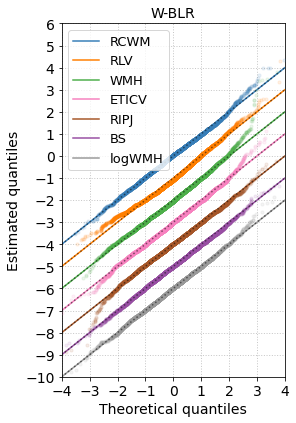

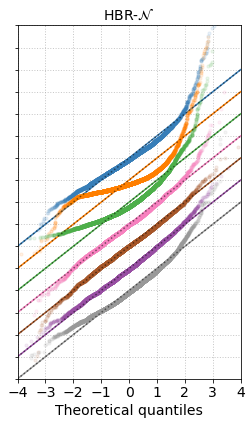

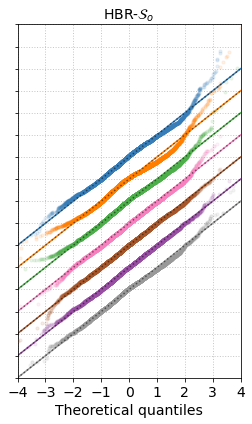

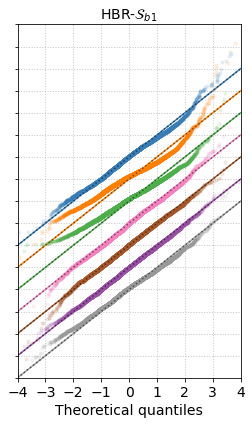

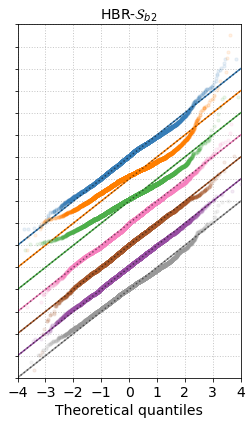

In [31]:
# qqplot(fold = 0, l='SHASHo')
# qqplot(fold = 0, l='SHASHb')
# qqplot(fold = 0, l='Normal')
fold = 0
qqplot(fold = fold, l='blr',legend=True,ylabel=True)
qqplot(fold = fold, l='Normal')

qqplot(fold = fold, l='SHASHo')

qqplot(fold = fold, l='SHASHb_1')
qqplot(fold = fold, l='SHASHb_2')
